# Coronary heart disease
## 1. Exploratory Analysis

Stole some plots from here: https://www.kaggle.com/code/sanchman/heart-failure-prediction-93-rec-88-acc-89-f1

### 1.1 Info and Distributions

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import math
from scipy import stats

In [8]:
# Loading Data
df = pd.read_csv('train_val_split.csv')
display(df.head())
display(df.info())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
2,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
3,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
4,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             734 non-null    int64  
 1   Sex             734 non-null    object 
 2   ChestPainType   734 non-null    object 
 3   RestingBP       734 non-null    int64  
 4   Cholesterol     734 non-null    int64  
 5   FastingBS       734 non-null    int64  
 6   RestingECG      734 non-null    object 
 7   MaxHR           734 non-null    int64  
 8   ExerciseAngina  734 non-null    object 
 9   Oldpeak         734 non-null    float64
 10  ST_Slope        734 non-null    object 
 11  HeartDisease    734 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 68.9+ KB


None

In [9]:
# FastingBS and Heart Disease wronly as int
df['FastingBS'] = df['FastingBS'].astype('object')
df['HeartDisease'] = df['HeartDisease'].astype('object')

In [10]:
# Data Exploration
display(df.describe(include="int64").round(2))
display(df.describe(include="object"))

,Age,RestingBP,Cholesterol,MaxHR
count,734.00,734.00,734.00,734.00
mean,53.52,132.06,197.59,136.17
std,9.42,18.62,108.98,25.33
min,29.00,0.00,0.00,60.00
25%,47.00,120.00,172.25,120.00
50%,54.00,130.00,222.00,138.00
75%,60.00,140.00,267.00,155.00
max,77.00,200.00,529.00,195.00


,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
count,734,734,734,734,734,734,734
unique,2,4,2,3,2,3,2
top,M,ASY,0,Normal,N,Flat,1
freq,573,381,563,440,439,364,398


In [11]:
# Missing Values
display(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

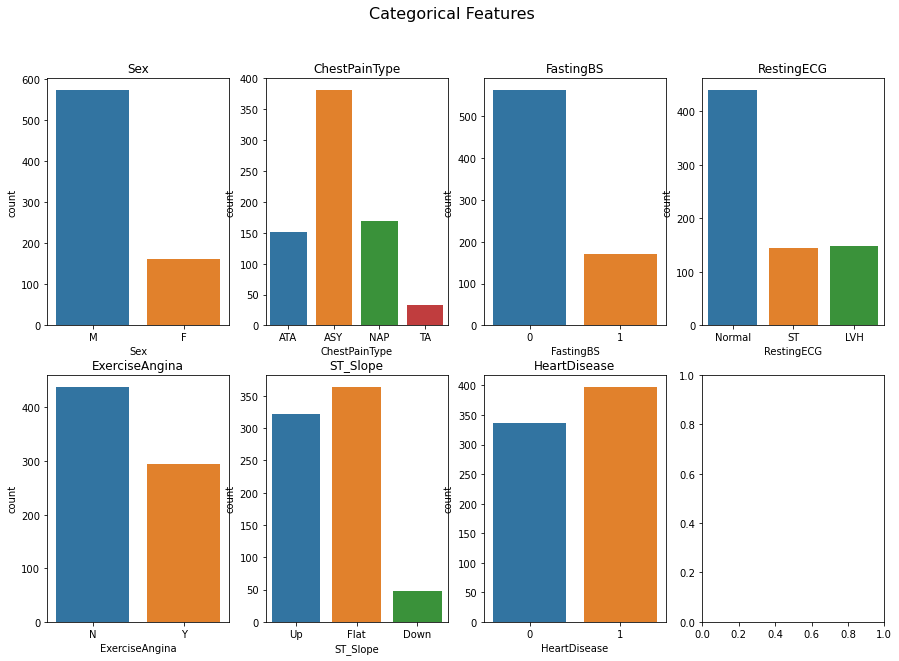

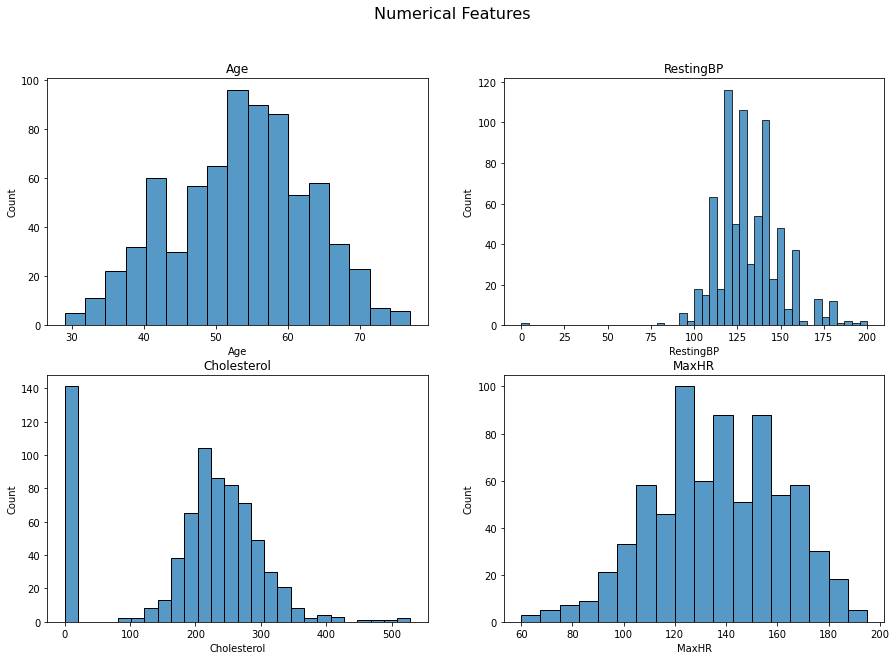

In [12]:
#Separating Categorical and Numerical Columns
categorical = df.select_dtypes(include="object").columns.tolist()
numerical = df.select_dtypes(include="int64").columns.tolist()

# Data Visualization
# Categorical Columns
fig, axs = plt.subplots(2, math.ceil(len(categorical)/2), figsize=(15, 10))
fig.suptitle('Categorical Features', fontsize=16)
for i, col in enumerate(categorical):
    ax = axs.reshape(-1)[i]
    ax.set_title(col)
    sns.countplot(x=col, data=df, ax=ax)

# Numerical Columns
fig, axs = plt.subplots(2, math.ceil(len(numerical)/2), figsize=(15, 10))
fig.suptitle('Numerical Features', fontsize=16)
for i, col in enumerate(numerical):
    ax = axs.reshape(-1)[i]
    ax.set_title(col)
    sns.histplot(x=col, data=df, ax=ax)

In [13]:
print("Number of 0 in RestingBP: ", df[df["RestingBP"] == 0].shape[0])
print("Number of 0 in Cholesterol: ", df[df["Cholesterol"] == 0].shape[0])

Number of 0 in RestingBP:  1
Number of 0 in Cholesterol:  141


Categorical

- The label heart disease seems to be balanced
- Gender is very imbalanced, could have an effect
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false), blood sugar levels lower for most participants
- restecg: resting electrocardiographic results normal for most

Numerical:
- Overall most are approximatly normally distributed
- Cholesterol has 141 entries with 0, maybe this is how they treated missing values
- RestingBP seems to have a weird outlier at 0, maybe also missing value
- Numerical Values are on different scales, for comparability reason one could standardize and center them but then interpretability might be lost.

Conclusion: I will remove the observations with 0 values in Cholesterol and RestingBP for the rest of the exploratory analysis, and then try different imputation methods for the models.

In [14]:
# Imputation and replacement
df_preprocessed = df.copy()
df_preprocessed = df_preprocessed[df_preprocessed["RestingBP"] != 0]
df_preprocessed = df_preprocessed[df_preprocessed["Cholesterol"] != 0]

<h3>1.2 Statistical Relationships

<AxesSubplot:>

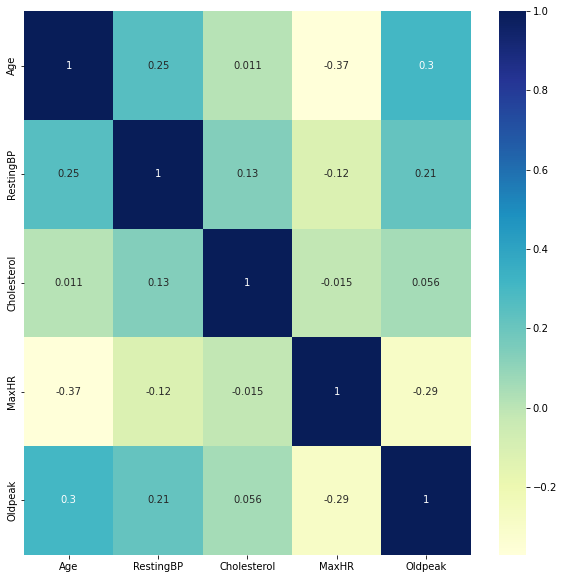

In [15]:
# Correlation between features
plt.figure(figsize=(10, 10))
sns.heatmap(df_preprocessed.corr(), annot=True, cmap="YlGnBu")

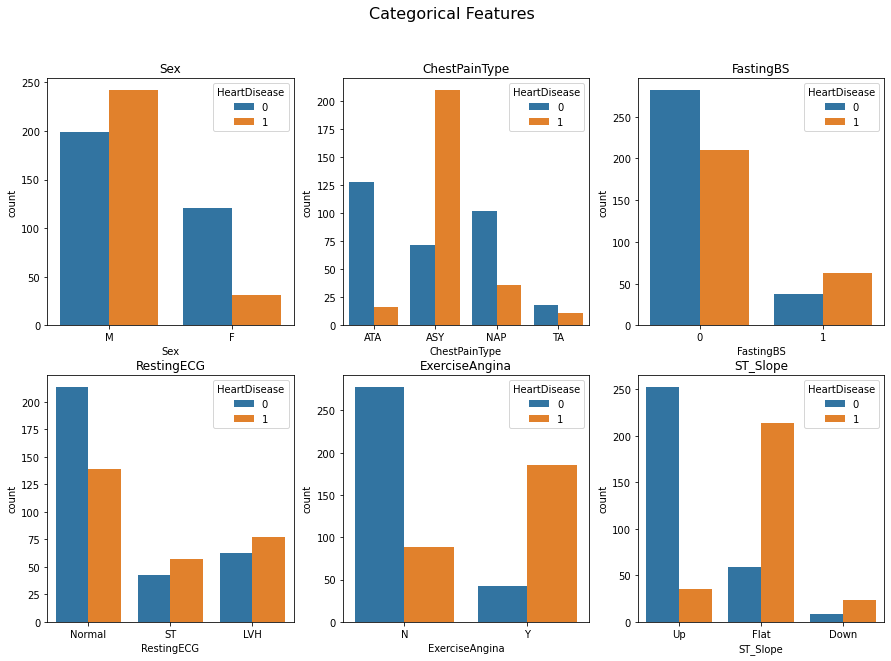

<Figure size 2160x1440 with 0 Axes>

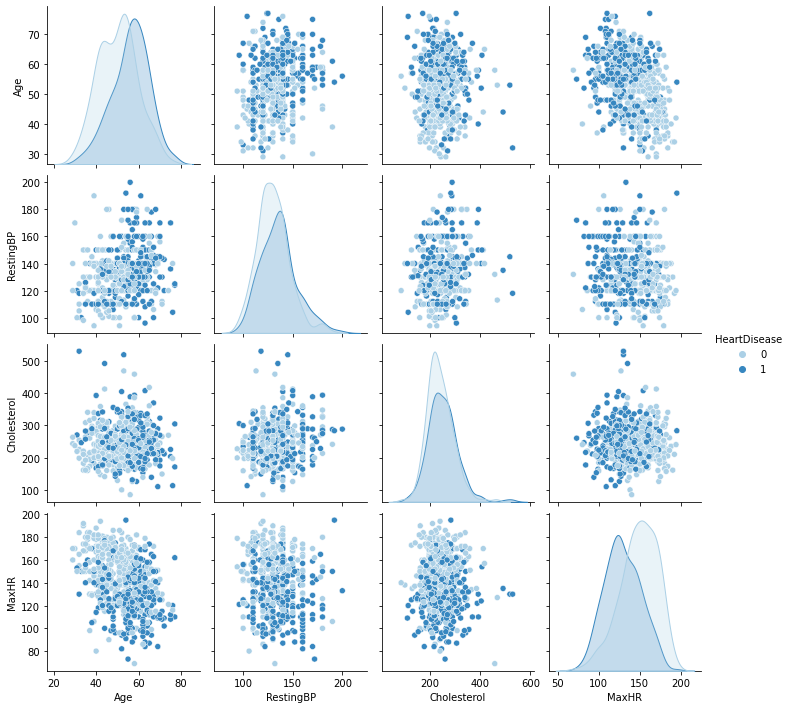

In [16]:
#Separating Categorical and Numerical Columns
categorical = df_preprocessed.select_dtypes(include="object").columns.tolist()[:-1]
numerical = df_preprocessed.select_dtypes(include="int64").columns.tolist()

# Categorical Columns
fig, axs = plt.subplots(2, math.ceil(len(categorical)/2), figsize=(15, 10))
fig.suptitle('Categorical Features', fontsize=16)
for i, col in enumerate(categorical):
    ax = axs.reshape(-1)[i]
    ax.set_title(col)
    sns.countplot(x=col, data=df_preprocessed, ax=ax, hue="HeartDisease")

# Histogram
pairplot_vars = numerical.copy()
pairplot_vars.append('HeartDisease')
figure = plt.figure(figsize=(30,20))
sns.pairplot(df_preprocessed[pairplot_vars], hue='HeartDisease', palette='Blues')



In [17]:
# Correlations of feature and target
y = df_preprocessed["HeartDisease"]
X = df_preprocessed.drop("HeartDisease", axis=1)

# Print Biserial Correlation for Numerical Features with Heart Disease
for col in numerical:
    print(col, ":", stats.pointbiserialr(X[col], y)[0])


Age : 0.3147631078582542
RestingBP : 0.16122528701544672
Cholesterol : 0.10634855859114178
MaxHR : -0.39682235510094693


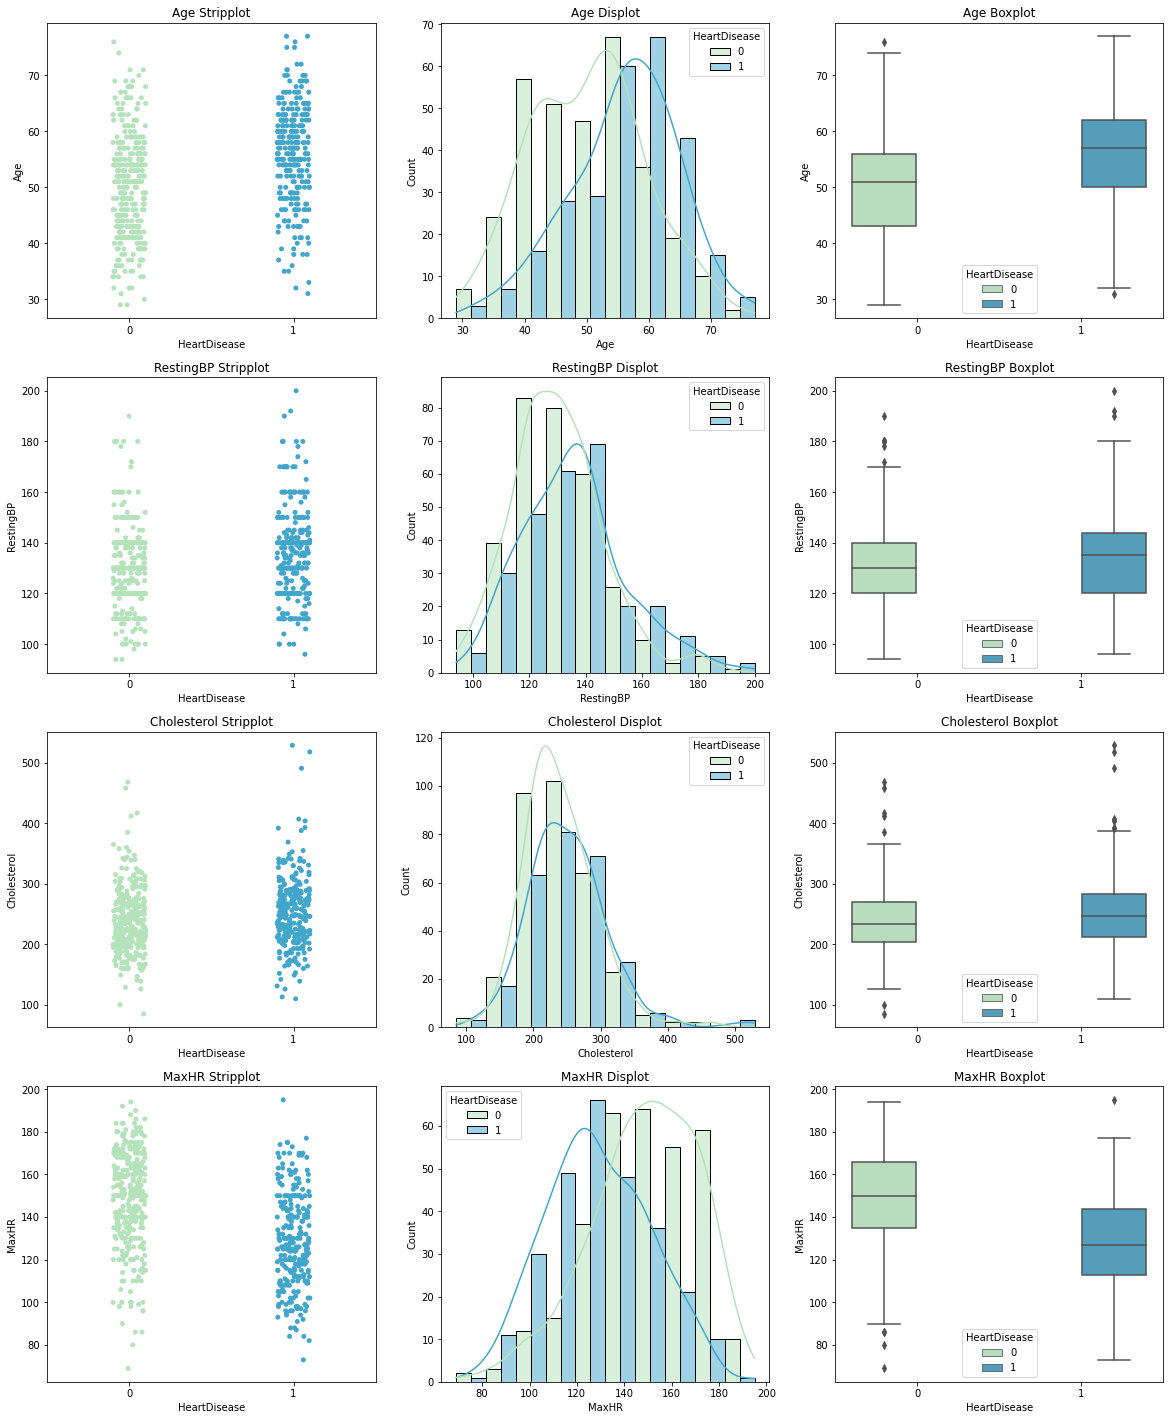

In [18]:
#This plot is from https://www.kaggle.com/code/sanchman/heart-failure-prediction-93-rec-88-acc-89-f1
fig, axes = plt.subplots(4, 3, figsize=(20,25))
for i, col in zip(range(4), numerical):
    sns.stripplot(ax=axes[i][0], x='HeartDisease', y=col, data=df_preprocessed, palette='GnBu', jitter=True)
    axes[i][0].set_title(f'{col} Stripplot')
    sns.histplot(ax=axes[i][1], x=col, data=df_preprocessed, kde=True, bins=10, palette='GnBu', hue='HeartDisease', multiple='dodge')
    axes[i][1].set_title(f'{col} Displot')
    sns.boxplot(ax=axes[i][2], x='HeartDisease', y=col, data=df_preprocessed, palette='GnBu', hue='HeartDisease')
    axes[i][2].set_title(f'{col} Boxplot')

### 1.3 EDA Conclusion
From the Plots and Correlation Coefficients it seems as though Sex and Age alone could be good predictors, with older people and males suffering more frequently from a Heart Disease. A certain type of chest pain (ASY) seems to be very common in people with a heart disease. Also ST_Slope and MaxHR seem to be promising indicators.

## 2 Logistic LASSO Regression
### 2.1 Preprocessing
For the preprocessing we should look:
1. Missing Values (0 values in Cholesterol and Resting BP) 
2. Rescaling/Standardizing our numerical features
3. OneHot Encoding for Categorical Variables

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
from group_lasso import GroupLasso


In [20]:
#Defining labels and features
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"].astype("int64")

#Numerical/Categorical Features:
numerical = X.select_dtypes(include="int64").columns.tolist()
categorical = X.select_dtypes(include="object").columns.tolist()
numerical_index = [X.columns.get_loc(col) for col in numerical]
categorical_index = [X.columns.get_loc(col) for col in categorical]

#Weird error with OneHotEncoder so need to convert to numpy
class NumpyTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.feature_names = X.columns.tolist()
        return self

    def transform(self, X, y=None):
        # Perform arbitary transformation
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        elif isinstance(X, np.ndarray):
            pass
        return X
    
    def get_feature_names_out(self, input_features=None):
        return self.feature_names

#Constructing Numerical Pipeline
numeric_transformer = Pipeline(steps= [("imputer", SimpleImputer(missing_values=0, strategy="median")), 
                                       ("scaler", StandardScaler())])

#Constructing Categorical Pipeline
categorical_transformer = Pipeline(steps=[("encoder", OneHotEncoder(handle_unknown="ignore", drop="first", categories="auto"))])

#Preporcessor
column_transformer = ColumnTransformer(transformers=[("num", numeric_transformer, numerical_index),
                                               ("cat", categorical_transformer, categorical_index)])
preprocessor = Pipeline(steps=[("numpy", NumpyTransformer()), ("column_transformer", column_transformer)])

#Constructing Pipeline
X_preprocessed = preprocessor.fit_transform(X)

#Fitting Model
model = LogisticRegression(penalty="none", solver="saga", max_iter=10000)
model.fit(X_preprocessed, y)

LogisticRegression(max_iter=10000, penalty='none', solver='saga')

In [21]:
#Coefficients and Importance
pd.DataFrame({"Features": preprocessor.get_feature_names_out(), "Coefficients": model.coef_[0]}).sort_values(by="Coefficients", ascending=False)

,Features,Coefficients
4,cat__Sex_M,1.792396
8,cat__FastingBS_1,1.142472
11,cat__ExerciseAngina_Y,0.967286
12,cat__ST_Slope_Flat,0.871950
0,num__Age,0.369329
2,num__Cholesterol,0.150737
9,cat__RestingECG_Normal,0.044391
1,num__RestingBP,0.009819
10,cat__RestingECG_ST,-0.087944
3,num__MaxHR,-0.108356


## 3 Decision Tree

In [22]:
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score

In [23]:
# Train Val Split
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Fitting Model
clf = tree.DecisionTreeClassifier()
clf_cv = GridSearchCV(clf, param_grid={"max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10]}, cv=5)
clf_cv.fit(X_train, y_train)
print("Best Parameters: ", clf_cv.best_params_)
print("Best Score: ", clf_cv.best_score_)

# Best Model
best_estimator = clf_cv.best_estimator_

# Feature Importance
print("Feature Importance: ")
pd.DataFrame({"Features": preprocessor.get_feature_names_out(), "Importance": best_estimator.feature_importances_}).sort_values(by="Importance", ascending=False)

Best Parameters:  {'max_depth': 3, 'min_samples_split': 2}
Best Score:  0.8313197160654788
Feature Importance: 


,Features,Importance
13,cat__ST_Slope_Up,0.728015
11,cat__ExerciseAngina_Y,0.112494
4,cat__Sex_M,0.086415
3,num__MaxHR,0.053291
8,cat__FastingBS_1,0.019785
0,num__Age,0.000000
1,num__RestingBP,0.000000
2,num__Cholesterol,0.000000
5,cat__ChestPainType_ATA,0.000000
6,cat__ChestPainType_NAP,0.000000


[Text(0.5, 0.875, 'cat__ST_Slope_Up <= 0.5\ngini = 0.495\nsamples = 587\nvalue = [265, 322]\nclass = Heart Disease'),
 Text(0.25, 0.625, 'cat__Sex_M <= 0.5\ngini = 0.294\nsamples = 335\nvalue = [60, 275]\nclass = Heart Disease'),
 Text(0.125, 0.375, 'cat__ExerciseAngina_Y <= 0.5\ngini = 0.5\nsamples = 53\nvalue = [27, 26]\nclass = No Heart Disease'),
 Text(0.0625, 0.125, 'gini = 0.438\nsamples = 34\nvalue = [23, 11]\nclass = No Heart Disease'),
 Text(0.1875, 0.125, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Heart Disease'),
 Text(0.375, 0.375, 'num__MaxHR <= 1.593\ngini = 0.207\nsamples = 282\nvalue = [33, 249]\nclass = Heart Disease'),
 Text(0.3125, 0.125, 'gini = 0.187\nsamples = 277\nvalue = [29, 248]\nclass = Heart Disease'),
 Text(0.4375, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = No Heart Disease'),
 Text(0.75, 0.625, 'cat__ExerciseAngina_Y <= 0.5\ngini = 0.303\nsamples = 252\nvalue = [205, 47]\nclass = No Heart Disease'),
 Text(0.625, 0.375, 'cat__Fasti

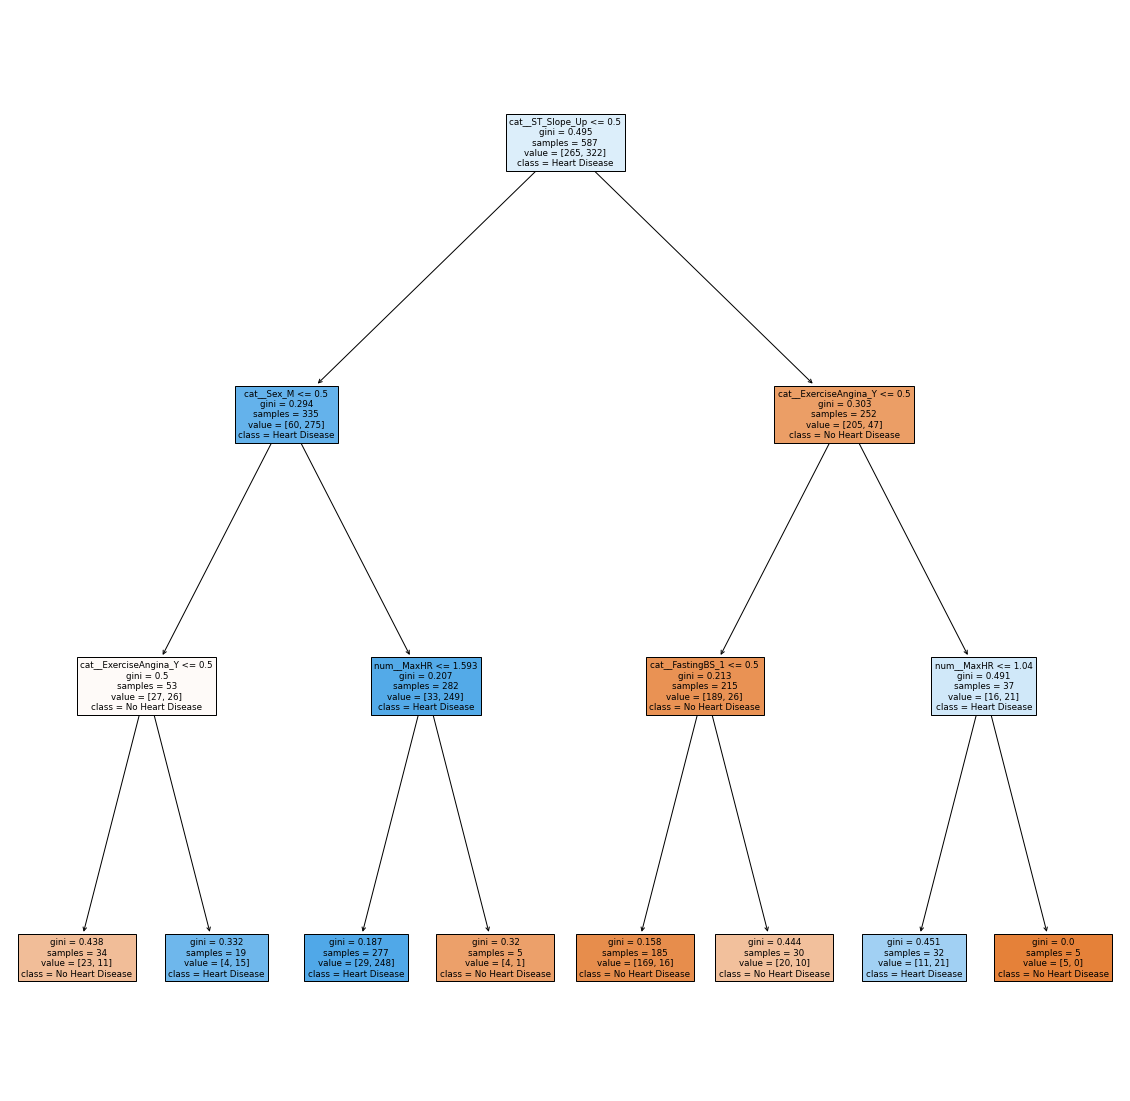

In [24]:
# Plotting Tree
plt.figure(figsize=(20, 20))
tree.plot_tree(best_estimator, feature_names=preprocessor.get_feature_names_out(), class_names=["No Heart Disease", "Heart Disease"], filled=True)

In [25]:
# Metrics

# Accuracy
accuracy = best_estimator.score(X_val, y_val)
print(accuracy)

# Confusion Matrix
y_pred = best_estimator.predict(X_val)
print("Confusion Matrix: ")
display(confusion_matrix(y_val, y_pred))

# F1 Score
print("F1 score: ", f1_score(y_val, y_pred))

# Recall
print("Recall: ", recall_score(y_val, y_pred))

# Precision
print("Precision: ", precision_score(y_val, y_pred))

0.8435374149659864
Confusion Matrix: 


array([[59, 12],
       [11, 65]], dtype=int64)

F1 score:  0.8496732026143792
Recall:  0.8552631578947368
Precision:  0.8441558441558441


With decision tree one has to be careful as not to overfit. Simply fitting them without max_depth and min_samples_split will lead to the algorithm building huge unpruned trees. These are not only overfitting to the data in a lot of cases, but are also hard to interpret due to their size. Doing 5-Fold CV led to the tree depicted above, which still has good metrics and is interpretable.
- Feature Importance: The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance. (From Sklearn Docs)
- According to the Gini Feature importance, ST_slope was able to greatly reduce uncertainty when predicting Heart Disease. 

## 4 MLP

In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm, trange
import shap
import pandas as pd
import numpy as np


In [43]:
# Data loading
X = pd.read_csv("train_val_split.csv").drop("HeartDisease", axis=1)
y = pd.read_csv("train_val_split.csv")["HeartDisease"].astype("int64")

# Preprocessing¨
X_preprocessed = preprocessor.transform(X)

# Train Validation Split
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y.to_numpy(), test_size=0.2, random_state=42)

# Test Data
X_test = pd.read_csv("test_split.csv").drop("HeartDisease", axis=1)
y_test = pd.read_csv("test_split.csv")["HeartDisease"].astype("int64")

In [45]:
#Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Defining Dataset
class HeartDiseaseDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Defining Model
class HeartDiseaseModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Defining Hyperparameters
input_size = X_preprocessed.shape[1]
hidden_size = 100
output_size = 2
batch_size = 32
num_epochs = 100
learning_rate = 0.001

# Defining Dataloader
dataset = HeartDiseaseDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Defining Model
mlp = HeartDiseaseModel(input_size, hidden_size, output_size)

# Defining Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp.parameters(), lr=learning_rate)

# Training Model
mlp.train()
for epoch in tqdm(range(num_epochs)):
    for batch_idx, (data, targets) in enumerate(dataloader):
        # Get data to cuda if possible
        data = data.to(device)
        targets = targets.to(device)

        # forward
        scores = mlp(data)
        loss = criterion(scores, targets)

        # backward
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()

100%|██████████| 100/100 [00:04<00:00, 24.71it/s]


In [47]:
# Predicting
mlp.eval()
with torch.no_grad():
    logits = mlp(torch.from_numpy(X_val).float().to(device))
    _, y_pred = logits.max(1)
    y_pred = y_pred.cpu().numpy()

# Metrics using Validation Data

#Accuracy
print("Accuracy: ", sum(y_pred == y_val) / len(y_val))

# Confusion Matrix
print("Confusion Matrix: ")
display(confusion_matrix(y_val, y_pred))

# F1 Score
print("F1 score: ", f1_score(y_val, y_pred))

# Recall
print("Recall: ", recall_score(y_val, y_pred))

# Precision
print("Precision: ", precision_score(y_val, y_pred))

Accuracy:  0.8775510204081632
Confusion Matrix: 


array([[62,  9],
       [ 9, 67]], dtype=int64)

F1 score:  0.881578947368421
Recall:  0.881578947368421
Precision:  0.881578947368421


In [50]:
F.softmax(logits, dim=1)[0]

tensor([1.0000e+00, 2.2237e-11])

#### Notes on the SHAP library and SHAP Values

- The calculation of the shap values is based on Monte Carlo sampling. You have to provide a "background dataset" from which the algorithm can take a random subsample to fill in the missing values that are not used in your coalition.
- The calculation works as follows: for a point x and feature of interest j do M iterations of
    1. Choose a random subset of features you want to have for coalition (in practice you can do this by random permutation of feature, then taking all features before j as fixed, replace the others)
	2. Randomly sample a datapoint z from the provided background dataset
	3. Replace all feature value in x that are not in coalition with values from z. 
	4. j+ the jth value from x, j- has value of j-th feature from z. $\phi^m_j = \hat{f}(x_{j+}) - \hat{f}(x_{j-})$ is unbiased estimator of shapley value of j the "additional contribution" of j-th feature.
    6. Repeat this M times to get an estimate of shapley value. $\phi_j = \frac{1}{M} \sum_{i=1}^M \phi^m_j$

- The input is a bit weird. You have to read in the docs (https://shap-lrjball.readthedocs.io/en/latest/generated/shap.DeepExplainer.html) what it expects. I went with the DeepExplainer because it was built for pytorch/tensorflow models and was faster than the standard KernelExplainer. Also the docsite is not that good, not every API reference is linked so for newer ones like DeepKernel need to search in Google.


#### Notes on Plots:

- To make the plots readable I had to construct another "classifier" that outputs the probability, because output of shap with DeepKernel is just model output, which was logit for us. If you use others like Tree Based stuff you can specify probability. So basically with this "probability classifier" we get the average shap values for the probabilities not the logits. 

- The plots take an "expected value" as reference. This is basically how the outcome of a prediction is changed from the expected outcome because of a specific feature input. We get an expected value for each output of our model, which is 2 in our case (because two classes). This provides a good sanity check because the plots for class 0 and 1 should be "reversed" in some sense.

- To get a better sense of what a feature does I chose a test case that was not as clearly classified to one class.


In [116]:
# Shap

# Explainer
explainer = shap.DeepExplainer(mlp, torch.from_numpy(X_train).float().to(device))

# Shap Values
shap_values = explainer.shap_values(torch.from_numpy(X_val).float().to(device))


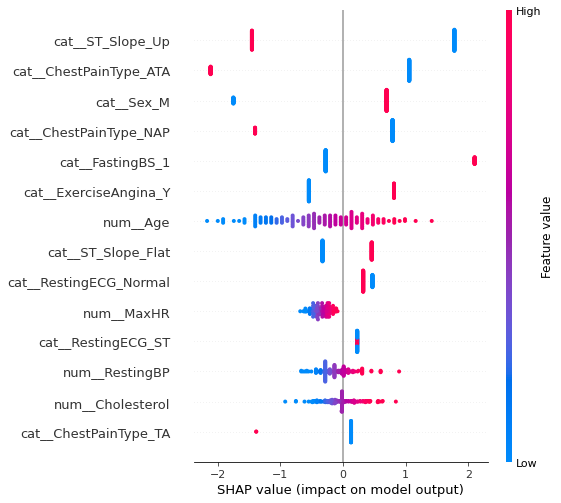

In [117]:
# Plotting Shap Values
shap.summary_plot(shap_values[1], torch.from_numpy(X_val).float().to(device).numpy(), feature_names=preprocessor.get_feature_names_out())

# Plotting Shap Values for a single instance, obs 0
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], torch.from_numpy(X_val).float().to(device).numpy()[0], 
                feature_names=preprocessor.get_feature_names_out())

In [118]:
# Most uncertain instance
logits = mlp(torch.from_numpy(X_val).float().to(device))
probs = F.softmax(logits, dim=1)

# Minimum index
uncertain_case = torch.argmin(abs(probs[:, 0] - probs[:, 1]))

# Plotting Shap Values for uncertain instance
shap.force_plot(explainer.expected_value[1], shap_values[1][uncertain_case], X_val[uncertain_case], link="identity", feature_names=preprocessor.get_feature_names_out())

In [127]:
# Shap Values

# Model
f = lambda x: mlp(torch.from_numpy(x).float().to(device)).detach().numpy()

# Explainer
explainer = shap.KernelExplainer(f, X_train[:100])
shap_values = explainer.shap_values(X_val[:10])

  0%|          | 0/10 [00:00<?, ?it/s]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC()

In [136]:
# Plotting individual Shap Values of obs 0
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_val[0], link="logit", feature_names=preprocessor.get_feature_names_out())



In [137]:
# Plotting Shap value class 0 obs 0
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_val[0], link="logit", feature_names=preprocessor.get_feature_names_out())

In [141]:
# Most uncertain instance
logits = mlp(torch.from_numpy(X_val).float().to(device))
probs = F.softmax(logits, dim=1)


# Minimum index
uncertain_case = torch.argmin(abs(probs[:, 0] - probs[:, 1]))
print("Uncertain Case: ", uncertain_case, " with probability: ", probs[uncertain_case], logits[uncertain_case])

# Plotting Shap Values for uncertain instance
shap.force_plot(explainer.expected_value[1], shap_values[1][uncertain_case], X_val[uncertain_case], link="identity", feature_names=preprocessor.get_feature_names_out())



Uncertain Case:  tensor(7)  with probability:  tensor([0.5749, 0.4251], grad_fn=<SelectBackward0>) tensor([0.3967, 0.0950], grad_fn=<SelectBackward0>)


In [143]:
np.exp(0.0950)/(1+np.exp(0.0950))

0.523732154126561

In [144]:
np.exp(0.3967)/(1+np.exp(0.3967))

0.5978945420770811

In [109]:
# Probability Model
class HeartDiseaseProb(nn.Module):
    def __init__(self, base_model):
        super().__init__()
        self.base_model = base_model

    def forward(self, x):
        x = self.base_model(x)
        if x.dim() == 1:
            x = x.unsqueeze(0)
        x = F.softmax(x, dim=1)
        return x
    
# Defining Model
model_prob = HeartDiseaseProb(mlp)

# Predicting
model_prob.eval()
with torch.no_grad():
    y_pred_prob = model_prob(torch.from_numpy(X_val).float().to(device))

# SHAP
explainer = shap.DeepExplainer(model_prob, torch.from_numpy(X_train).float().to(device))
shap_values = explainer.shap_values(torch.from_numpy(X_val).float().to(device))

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


In [110]:
# Explainer uses expected values from mean prediction of training data
print("Expected Value: ", explainer.expected_value)
print("Mean prediction of training data: ", model_prob(torch.from_numpy(X_train).float().to(device)).mean(0))

print("Prediction: ", y_pred_prob[0])

# Shap values were evaluated on the test data using the expected value from training data
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_val[0,:], feature_names=preprocessor.get_feature_names_out(), link="logit")


Expected Value:  [0.4483892  0.55161077]
Mean prediction of training data:  tensor([0.4484, 0.5516], grad_fn=<MeanBackward1>)
Prediction:  tensor([1.0000e+00, 2.2237e-11])


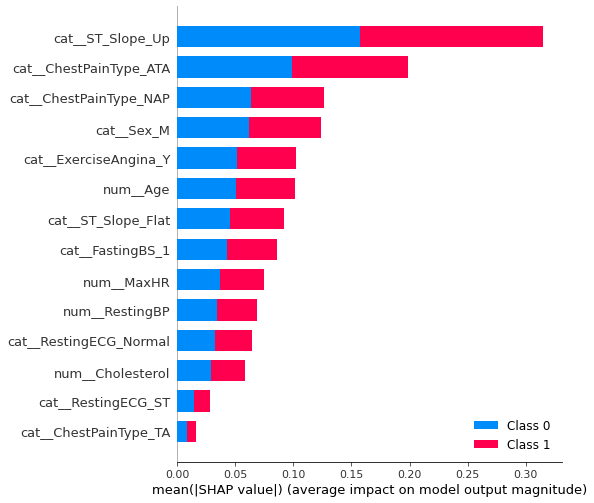

In [90]:
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=preprocessor.get_feature_names_out())

In [78]:
# Explain many predictions
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test, feature_names=preprocessor.get_feature_names_out())

## 3 Decision Tree Marc

In [ ]:
# Setup Marc
import os 
import pandas as pd


path = os.path.join(os.getcwd(), "heart_failure")
df = pd.read_csv(os.path.join(path, "train_val_split.csv"))
df_test = pd.read_csv(os.path.join(path, "test_split.csv"))

In [ ]:
# Tree Libs

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt


In [ ]:
#Defining labels and features
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"].astype("int64")

#Numerical/Categorical Features:
numerical = X.select_dtypes(include="int64").columns.tolist()
categorical = X.select_dtypes(include="object").columns.tolist()
numerical_index = [X.columns.get_loc(col) for col in numerical]
categorical_index = [X.columns.get_loc(col) for col in categorical]

#Weird error with OneHotEncoder so need to convert to numpy
class NumpyTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.feature_names = X.columns.tolist()
        return self

    def transform(self, X, y=None):
        # Perform arbitary transformation
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        elif isinstance(X, np.ndarray):
            pass
        return X
    
    def get_feature_names_out(self, input_features=None):
        return self.feature_names

#Constructing Numerical Pipeline
numeric_transformer = Pipeline(steps= [("imputer", SimpleImputer(missing_values=0, strategy="median")), 
                                       ("scaler", StandardScaler())])

#Constructing Categorical Pipeline
categorical_transformer = Pipeline(steps=[("encoder", OneHotEncoder(handle_unknown="ignore", drop="first", categories="auto"))])

#Preporcessor
column_transformer = ColumnTransformer(transformers=[("num", numeric_transformer, numerical_index),
                                               ("cat", categorical_transformer, categorical_index)])
preprocessor = Pipeline(steps=[("numpy", NumpyTransformer()), ("column_transformer", column_transformer)])

#Constructing Pipeline
X_preprocessed = preprocessor.fit_transform(X)

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score

In [ ]:
# Train Val Split
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Fitting Model
clf = tree.DecisionTreeClassifier()
clf_cv = GridSearchCV(clf, param_grid={"max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10]}, cv=5)
clf_cv.fit(X_train, y_train)
print("Best Parameters: ", clf_cv.best_params_)
print("Best Score: ", clf_cv.best_score_)

# Best Model
best_estimator = clf_cv.best_estimator_

# Feature Importance
print("Feature Importance: ")
pd.DataFrame({"Features": preprocessor.get_feature_names_out(), "Importance": best_estimator.feature_importances_}).sort_values(by="Importance", ascending=False)

Best Parameters:  {'max_depth': 3, 'min_samples_split': 6}
Best Score:  0.8261915109372737
Feature Importance: 


,Features,Importance
13,cat__ST_Slope_Up,0.728133
11,cat__ExerciseAngina_Y,0.112512
5,cat__Sex_M,0.086429
4,num__MaxHR,0.053300
0,num__Age,0.019626
1,num__RestingBP,0.000000
2,num__Cholesterol,0.000000
3,num__FastingBS,0.000000
6,cat__ChestPainType_ATA,0.000000
7,cat__ChestPainType_NAP,0.000000


[Text(0.5, 0.875, 'cat__ST_Slope_Up <= 0.5\ngini = 0.495\nsamples = 587\nvalue = [265, 322]\nclass = Heart Disease'),
 Text(0.25, 0.625, 'cat__Sex_M <= 0.5\ngini = 0.294\nsamples = 335\nvalue = [60, 275]\nclass = Heart Disease'),
 Text(0.125, 0.375, 'cat__ExerciseAngina_Y <= 0.5\ngini = 0.5\nsamples = 53\nvalue = [27, 26]\nclass = No Heart Disease'),
 Text(0.0625, 0.125, 'gini = 0.438\nsamples = 34\nvalue = [23, 11]\nclass = No Heart Disease'),
 Text(0.1875, 0.125, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Heart Disease'),
 Text(0.375, 0.375, 'num__MaxHR <= 1.593\ngini = 0.207\nsamples = 282\nvalue = [33, 249]\nclass = Heart Disease'),
 Text(0.3125, 0.125, 'gini = 0.187\nsamples = 277\nvalue = [29, 248]\nclass = Heart Disease'),
 Text(0.4375, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = No Heart Disease'),
 Text(0.75, 0.625, 'cat__ExerciseAngina_Y <= 0.5\ngini = 0.303\nsamples = 252\nvalue = [205, 47]\nclass = No Heart Disease'),
 Text(0.625, 0.375, 'num__Age <

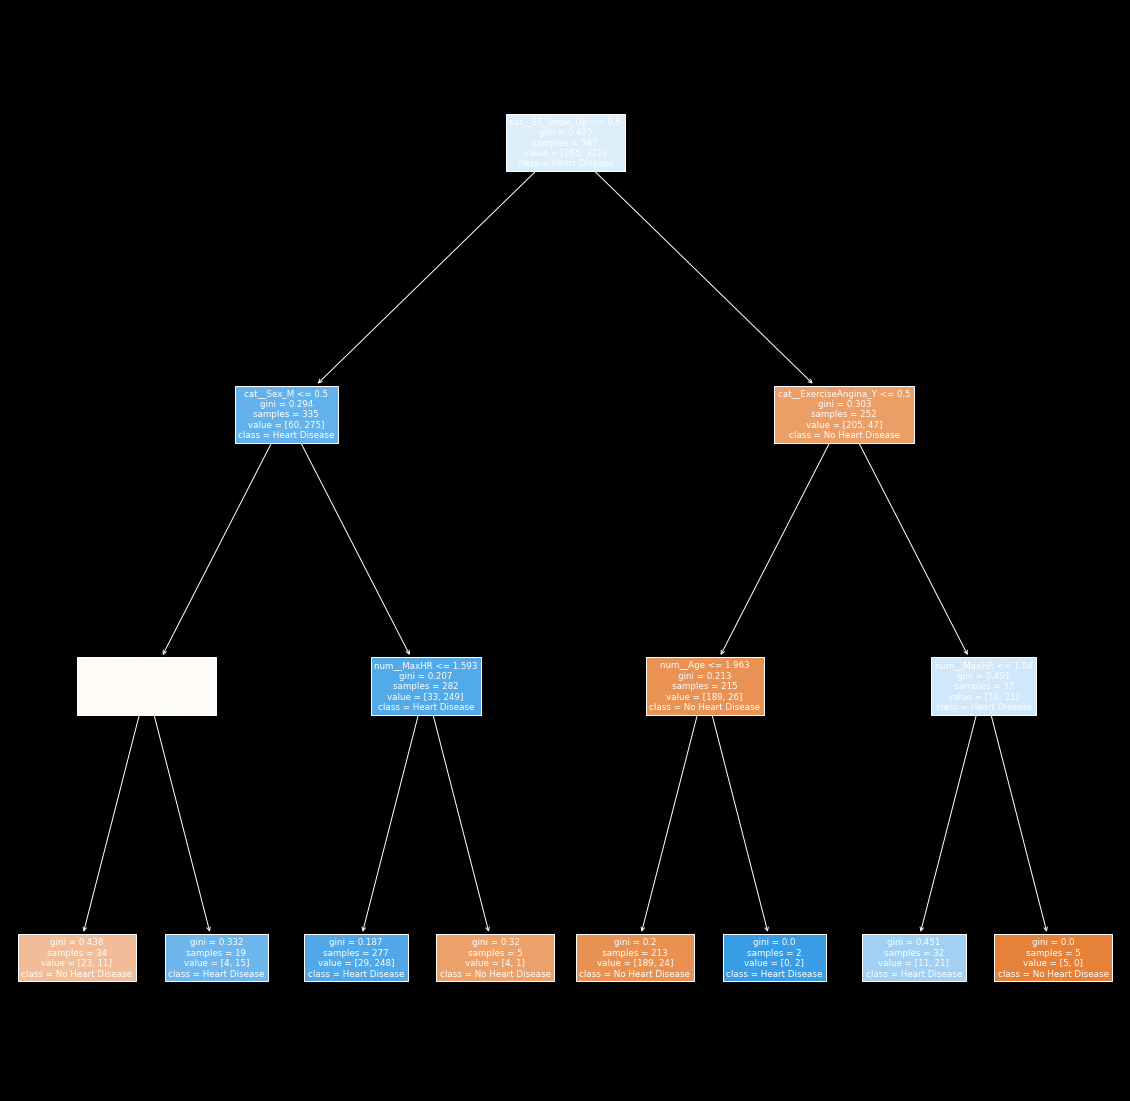

In [ ]:
# Plotting Tree
plt.figure(figsize=(20, 20))
tree.plot_tree(best_estimator, feature_names=preprocessor.get_feature_names_out(), class_names=["No Heart Disease", "Heart Disease"], filled=True)

In [ ]:
# Metrics

# Accuracy
accuracy = best_estimator.score(X_val, y_val)
print(accuracy)

# Confusion Matrix
y_pred = best_estimator.predict(X_val)
print("Confusion Matrix: ")
display(confusion_matrix(y_val, y_pred))

# F1 Score
print("F1 score: ", f1_score(y_val, y_pred))

# Recall
print("Recall: ", recall_score(y_val, y_pred))

# Precision
print("Precision: ", precision_score(y_val, y_pred))

0.8367346938775511
Confusion Matrix: 


array([[58, 13],
       [11, 65]], dtype=int64)

F1 score:  0.8441558441558442
Recall:  0.8552631578947368
Precision:  0.8333333333333334


With decision tree one has to be careful as not to overfit. Simply fitting them without max_depth and min_samples_split will lead to the algorithm building huge unpruned trees. These are not only overfitting to the data in a lot of cases, but are also hard to interpret due to their size. Doing 5-Fold CV led to the tree depicted above, which still has good metrics and is interpretable.
- Feature Importance: The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance. (From Sklearn Docs)
- According to the Gini Feature importance, ST_slope was able to greatly reduce uncertainty when predicting Heart Disease. 

## 4 MLP

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm, trange
import shap
import pandas as pd
import numpy as np


In [ ]:
# Data loading
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"].astype("int64")

# Preprocessing¨
X_preprocessed = preprocessor.transform(X)

# Train Validation Split
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y.to_numpy(), test_size=0.2, random_state=42)

# Test Data
X_test = preprocessor.transform(df_test.drop("HeartDisease", axis=1))
y_test = df_test["HeartDisease"].astype("int64").to_numpy()

In [ ]:
#Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Defining Dataset
class HeartDiseaseDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Defining Model
class HeartDiseaseModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Defining Hyperparameters
input_size = X_preprocessed.shape[1]
hidden_size = 100
output_size = 2
batch_size = 32
num_epochs = 100
learning_rate = 0.001

# Defining Dataloader
dataset = HeartDiseaseDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Defining Model
mlp = HeartDiseaseModel(input_size, hidden_size, output_size)

# Defining Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp.parameters(), lr=learning_rate)

# Training Model
mlp.train()
for epoch in tqdm(range(num_epochs)):
    for batch_idx, (data, targets) in enumerate(dataloader):
        # Get data to cuda if possible
        data = data.to(device)
        targets = targets.to(device)

        # forward
        scores = mlp(data)
        loss = criterion(scores, targets)

        # backward
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()

100%|██████████| 100/100 [00:02<00:00, 45.68it/s]


In [ ]:
# Predicting
mlp.eval()
with torch.no_grad():
    logits = mlp(torch.from_numpy(X_val).float().to(device))
    _, y_pred = logits.max(1)
    y_pred = y_pred.cpu().numpy()

# Metrics using Validation Data

#Accuracy
print("Accuracy: ", sum(y_pred == y_val) / len(y_val))

# Confusion Matrix
print("Confusion Matrix: ")
display(confusion_matrix(y_val, y_pred))

# F1 Score
print("F1 score: ", f1_score(y_val, y_pred))

# Recall
print("Recall: ", recall_score(y_val, y_pred))

# Precision
print("Precision: ", precision_score(y_val, y_pred))

Accuracy:  0.8639455782312925
Confusion Matrix: 


array([[61, 10],
       [10, 66]], dtype=int64)

F1 score:  0.868421052631579
Recall:  0.868421052631579
Precision:  0.868421052631579


In [ ]:
# Predicting on Test Data
mlp.eval()
with torch.no_grad():
    logits = mlp(torch.from_numpy(X_test).float().to(device))
    _, y_pred = logits.max(1)
    y_pred = y_pred.cpu().numpy()

#### Notes on the SHAP library and SHAP Values

- The calculation of the shap values is based on Monte Carlo sampling. You have to provide a "background dataset" from which the algorithm can take a random subsample to fill in the missing values that are not used in your coalition.
- The calculation works as follows: for a point x and feature of interest j do M iterations of
    1. Choose a random subset of features you want to have for coalition (in practice you can do this by random permutation of feature, then taking all features before j as fixed, replace the others)
	2. Randomly sample a datapoint z from the provided background dataset
	3. Replace all feature value in x that are not in coalition with values from z. 
	4. j+ the jth value from x, j- has value of j-th feature from z. $\phi^m_j = \hat{f}(x_{j+}) - \hat{f}(x_{j-})$ is unbiased estimator of shapley value of j the "additional contribution" of j-th feature.
    6. Repeat this M times to get an estimate of shapley value. $\phi_j = \frac{1}{M} \sum_{i=1}^M \phi^m_j$

- The input is a bit weird. You have to read in the docs (https://shap-lrjball.readthedocs.io/en/latest/generated/shap.DeepExplainer.html) what it expects. I went with the DeepExplainer because it was built for pytorch/tensorflow models and was faster than the standard KernelExplainer. Also the docsite is not that good, not every API reference is linked so for newer ones like DeepKernel need to search in Google. But DeepExplainer has some weird bug as it does not give you the same output you get from your model, this post here explained the issue: https://github.com/slundberg/shap/issues/1678


#### Notes on Plots:

- To make the plots readable I had to construct another "classifier" that outputs the probability, because output of shap with DeepKernel is just model output, which was logit for us. If you use others like Tree Based stuff you can specify probability. So basically with this "probability classifier" we get the average shap values for the probabilities not the logits. 

- The plots take an "expected value" as reference. This is basically how the outcome of a prediction is changed from the expected outcome because of a specific feature input. We get an expected value for each output of our model, which is 2 in our case (because two classes). This provides a good sanity check because the plots for class 0 and 1 should be "reversed" in some sense.

- To get a better sense of what a feature does I chose a test case that was not as clearly classified to one class.


In [ ]:
# Shap Values

# Model
f = lambda x: F.softmax(mlp(torch.from_numpy(x).float().to(device)), dim = 1).detach().numpy()

# Explainer
explainer = shap.KernelExplainer(f, X_train[:100])
shap_values = explainer.shap_values(X_val[:100])

100%|██████████| 100/100 [01:11<00:00,  1.40it/s]


In [ ]:
# Expected Values (= Base Probabilities of classes 0 and 1)
print("Expected Values: ", explainer.expected_value)

Expected Values:  [0.46784327 0.53215672]


In [ ]:
# Prediction for obs 0
logs_0 = mlp(torch.from_numpy(X_val[0].reshape(1, -1)).float().to(device))
probs_0 = F.softmax(logs_0, dim = 1)
print("Prediction for obs 0: ", probs_0)
print("Actual for obs 0: ", y_val[0])

# Plotting individual Shap Values of obs 0 class 0
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_val[0], link="identity", feature_names=preprocessor.get_feature_names_out())



Prediction for obs 0:  tensor([[1.0000e+00, 1.0181e-10]], grad_fn=<SoftmaxBackward0>)
Actual for obs 0:  0


In [ ]:
# Plotting individual Shap Values of obs 0 class 1
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_val[0], link="identity", feature_names=preprocessor.get_feature_names_out())

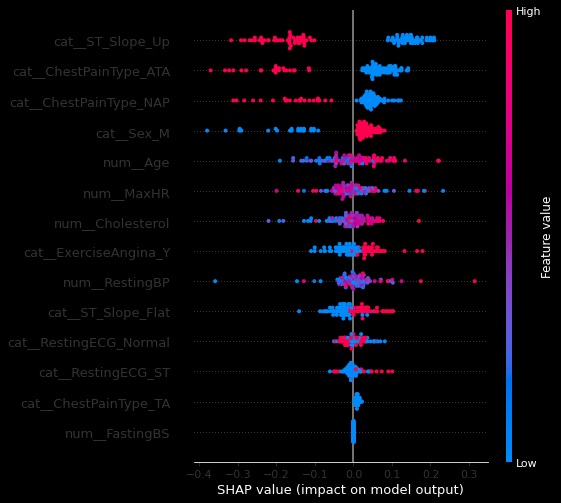

In [ ]:
# Plotting Shap Values for class 1 for first 100 obs (calculation of values takes a long time)
shap.summary_plot(shap_values[1], X_val[:100], feature_names=preprocessor.get_feature_names_out())

### Interpretation

From the expected value of the class (averaged probability of belonging to that class) we see how each feature of an observation contributes to the end prediction in PLot 1. For example for the first observation it seems that the feature cat_ST_Slope_Up = 1 drove the probability for class 1 down, and for class 0 up. This is also reflected in the second summary plot, where we see that over all observations for which we calculated shapley values (first 100) the feature cat_ST_Slope_Up = 1 drove the prediction of class 1 down and the feature cat_ST_Slope_Up = 0 drove the prediction of class 1 up.

These things are line with the tree and LASSO fit we have produced earlier. As we have given the shap values to explain probabilites this could be a problem in NNs that are not well calibrated. So we'll display a calibration plot.

In [ ]:
# Most uncertain instance
logits = mlp(torch.from_numpy(X_val).float().to(device))
probs = F.softmax(logits, dim=1)

# Minimum index
uncertain_case = torch.argmin(abs(probs[:, 0] - probs[:, 1]))

# Plotting Shap Values for uncertain instance
shap.force_plot(explainer.expected_value[1], shap_values[1][uncertain_case], X_val[uncertain_case], link="identity", feature_names=preprocessor.get_feature_names_out())

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


In [ ]:
# Plots for calibration: https://github.com/hollance/reliability-diagrams/blob/master/reliability_diagrams.py
import os
import numpy as np
import matplotlib.pyplot as plt


def compute_calibration(true_labels, pred_labels, confidences, num_bins=10):
    """Collects predictions into bins used to draw a reliability diagram.

    Arguments:
        true_labels: the true labels for the test examples
        pred_labels: the predicted labels for the test examples
        confidences: the predicted confidences for the test examples
        num_bins: number of bins

    The true_labels, pred_labels, confidences arguments must be NumPy arrays;
    pred_labels and true_labels may contain numeric or string labels.

    For a multi-class model, the predicted label and confidence should be those
    of the highest scoring class.

    Returns a dictionary containing the following NumPy arrays:
        accuracies: the average accuracy for each bin
        confidences: the average confidence for each bin
        counts: the number of examples in each bin
        bins: the confidence thresholds for each bin
        avg_accuracy: the accuracy over the entire test set
        avg_confidence: the average confidence over the entire test set
        expected_calibration_error: a weighted average of all calibration gaps
        max_calibration_error: the largest calibration gap across all bins
    """
    assert(len(confidences) == len(pred_labels))
    assert(len(confidences) == len(true_labels))
    assert(num_bins > 0)

    bin_size = 1.0 / num_bins
    bins = np.linspace(0.0, 1.0, num_bins + 1)
    indices = np.digitize(confidences, bins, right=True)

    bin_accuracies = np.zeros(num_bins, dtype=np.float)
    bin_confidences = np.zeros(num_bins, dtype=np.float)
    bin_counts = np.zeros(num_bins, dtype=np.int)

    for b in range(num_bins):
        selected = np.where(indices == b + 1)[0]
        if len(selected) > 0:
            bin_accuracies[b] = np.mean(true_labels[selected] == pred_labels[selected])
            bin_confidences[b] = np.mean(confidences[selected])
            bin_counts[b] = len(selected)

    avg_acc = np.sum(bin_accuracies * bin_counts) / np.sum(bin_counts)
    avg_conf = np.sum(bin_confidences * bin_counts) / np.sum(bin_counts)

    gaps = np.abs(bin_accuracies - bin_confidences)
    ece = np.sum(gaps * bin_counts) / np.sum(bin_counts)
    mce = np.max(gaps)

    return { "accuracies": bin_accuracies, 
             "confidences": bin_confidences, 
             "counts": bin_counts, 
             "bins": bins,
             "avg_accuracy": avg_acc,
             "avg_confidence": avg_conf,
             "expected_calibration_error": ece,
             "max_calibration_error": mce }


def _reliability_diagram_subplot(ax, bin_data, 
                                 draw_ece=True, 
                                 draw_bin_importance=False,
                                 title="Reliability Diagram", 
                                 xlabel="Confidence", 
                                 ylabel="Expected Accuracy"):
    """Draws a reliability diagram into a subplot."""
    accuracies = bin_data["accuracies"]
    confidences = bin_data["confidences"]
    counts = bin_data["counts"]
    bins = bin_data["bins"]

    bin_size = 1.0 / len(counts)
    positions = bins[:-1] + bin_size/2.0

    widths = bin_size
    alphas = 0.3
    min_count = np.min(counts)
    max_count = np.max(counts)
    normalized_counts = (counts - min_count) / (max_count - min_count)

    if draw_bin_importance == "alpha":
        alphas = 0.2 + 0.8*normalized_counts
    elif draw_bin_importance == "width":
        widths = 0.1*bin_size + 0.9*bin_size*normalized_counts

    colors = np.zeros((len(counts), 4))
    colors[:, 0] = 240 / 255.
    colors[:, 1] = 60 / 255.
    colors[:, 2] = 60 / 255.
    colors[:, 3] = alphas

    gap_plt = ax.bar(positions, np.abs(accuracies - confidences), 
                     bottom=np.minimum(accuracies, confidences), width=widths,
                     edgecolor=colors, color=colors, linewidth=1, label="Gap")

    acc_plt = ax.bar(positions, 0, bottom=accuracies, width=widths,
                     edgecolor="black", color="black", alpha=1.0, linewidth=3,
                     label="Accuracy")

    ax.set_aspect("equal")
    ax.plot([0,1], [0,1], linestyle = "--", color="gray")
    
    if draw_ece:
        ece = (bin_data["expected_calibration_error"] * 100)
        ax.text(0.98, 0.02, "ECE=%.2f" % ece, color="black", 
                ha="right", va="bottom", transform=ax.transAxes)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    #ax.set_xticks(bins)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    ax.legend(handles=[gap_plt, acc_plt])


def _confidence_histogram_subplot(ax, bin_data, 
                                  draw_averages=True,
                                  title="Examples per bin", 
                                  xlabel="Confidence",
                                  ylabel="Count"):
    """Draws a confidence histogram into a subplot."""
    counts = bin_data["counts"]
    bins = bin_data["bins"]

    bin_size = 1.0 / len(counts)
    positions = bins[:-1] + bin_size/2.0

    ax.bar(positions, counts, width=bin_size * 0.9)
   
    ax.set_xlim(0, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if draw_averages:
        acc_plt = ax.axvline(x=bin_data["avg_accuracy"], ls="solid", lw=3, 
                             c="black", label="Accuracy")
        conf_plt = ax.axvline(x=bin_data["avg_confidence"], ls="dotted", lw=3, 
                              c="#444", label="Avg. confidence")
        ax.legend(handles=[acc_plt, conf_plt])


def _reliability_diagram_combined(bin_data, 
                                  draw_ece, draw_bin_importance, draw_averages, 
                                  title, figsize, dpi, return_fig):
    """Draws a reliability diagram and confidence histogram using the output
    from compute_calibration()."""
    figsize = (figsize[0], figsize[0] * 1.4)

    fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=figsize, dpi=dpi, 
                           gridspec_kw={"height_ratios": [4, 1]})

    plt.tight_layout()
    plt.subplots_adjust(hspace=-0.1)

    _reliability_diagram_subplot(ax[0], bin_data, draw_ece, draw_bin_importance, 
                                 title=title, xlabel="")

    # Draw the confidence histogram upside down.
    orig_counts = bin_data["counts"]
    bin_data["counts"] = -bin_data["counts"]
    _confidence_histogram_subplot(ax[1], bin_data, draw_averages, title="")
    bin_data["counts"] = orig_counts

    # Also negate the ticks for the upside-down histogram.
    new_ticks = np.abs(ax[1].get_yticks()).astype(np.int)
    ax[1].set_yticklabels(new_ticks)    

    plt.show()

    if return_fig: return fig


def reliability_diagram(true_labels, pred_labels, confidences, num_bins=10,
                        draw_ece=True, draw_bin_importance=False, 
                        draw_averages=True, title="Reliability Diagram", 
                        figsize=(6, 6), dpi=72, return_fig=False):
    """Draws a reliability diagram and confidence histogram in a single plot.
    
    First, the model's predictions are divided up into bins based on their
    confidence scores.

    The reliability diagram shows the gap between average accuracy and average 
    confidence in each bin. These are the red bars.

    The black line is the accuracy, the other end of the bar is the confidence.

    Ideally, there is no gap and the black line is on the dotted diagonal.
    In that case, the model is properly calibrated and we can interpret the
    confidence scores as probabilities.

    The confidence histogram visualizes how many examples are in each bin. 
    This is useful for judging how much each bin contributes to the calibration
    error.

    The confidence histogram also shows the overall accuracy and confidence. 
    The closer these two lines are together, the better the calibration.
    
    The ECE or Expected Calibration Error is a summary statistic that gives the
    difference in expectation between confidence and accuracy. In other words,
    it's a weighted average of the gaps across all bins. A lower ECE is better.

    Arguments:
        true_labels: the true labels for the test examples
        pred_labels: the predicted labels for the test examples
        confidences: the predicted confidences for the test examples
        num_bins: number of bins
        draw_ece: whether to include the Expected Calibration Error
        draw_bin_importance: whether to represent how much each bin contributes
            to the total accuracy: False, "alpha", "widths"
        draw_averages: whether to draw the overall accuracy and confidence in
            the confidence histogram
        title: optional title for the plot
        figsize: setting for matplotlib; height is ignored
        dpi: setting for matplotlib
        return_fig: if True, returns the matplotlib Figure object
    """
    bin_data = compute_calibration(true_labels, pred_labels, confidences, num_bins)
    return _reliability_diagram_combined(bin_data, draw_ece, draw_bin_importance,
                                         draw_averages, title, figsize=figsize, 
                                         dpi=dpi, return_fig=return_fig)


def reliability_diagrams(results, num_bins=10,
                         draw_ece=True, draw_bin_importance=False, 
                         num_cols=4, dpi=72, return_fig=False):
    """Draws reliability diagrams for one or more models.
    
    Arguments:
        results: dictionary where the key is the model name and the value is
            a dictionary containing the true labels, predicated labels, and
            confidences for this model
        num_bins: number of bins
        draw_ece: whether to include the Expected Calibration Error
        draw_bin_importance: whether to represent how much each bin contributes
            to the total accuracy: False, "alpha", "widths"
        num_cols: how wide to make the plot
        dpi: setting for matplotlib
        return_fig: if True, returns the matplotlib Figure object
    """
    ncols = num_cols
    nrows = (len(results) + ncols - 1) // ncols
    figsize = (ncols * 4, nrows * 4)

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, 
                           figsize=figsize, dpi=dpi, constrained_layout=True)

    for i, (plot_name, data) in enumerate(results.items()):
        y_true = data["true_labels"]
        y_pred = data["pred_labels"]
        y_conf = data["confidences"]
        
        bin_data = compute_calibration(y_true, y_pred, y_conf, num_bins)
        
        row = i // ncols
        col = i % ncols
        _reliability_diagram_subplot(ax[row, col], bin_data, draw_ece, 
                                     draw_bin_importance, 
                                     title="\n".join(plot_name.split()),
                                     xlabel="Confidence" if row == nrows - 1 else "",
                                     ylabel="Expected Accuracy" if col == 0 else "")

    for i in range(i + 1, nrows * ncols):
        row = i // ncols
        col = i % ncols        
        ax[row, col].axis("off")
        
    plt.show()

    if return_fig: return fig

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use

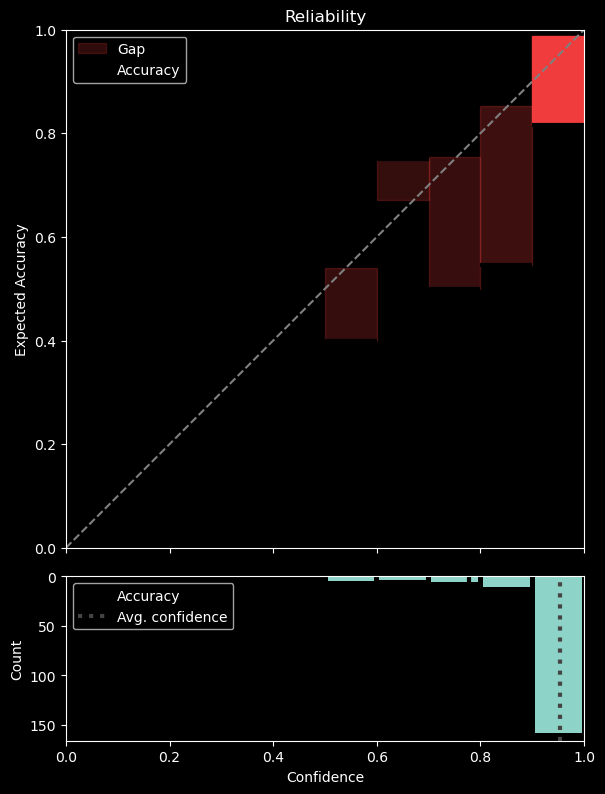

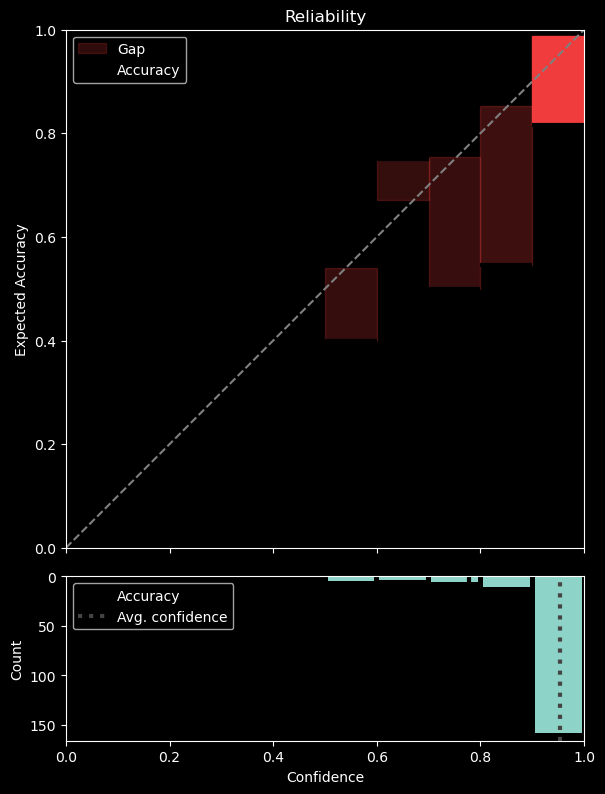

In [ ]:
# Plotting reliability of test set
y_true = y_test
# Predicting on Test Data
mlp.eval()
with torch.no_grad():
    logits = mlp(torch.from_numpy(X_test).float().to(device))
    y_conf = F.softmax(logits, dim=1).max(1)[0].numpy()
    _, y_pred = logits.max(1)
    y_pred = y_pred.cpu().numpy()
reliability_diagram(y_true, y_pred, y_conf, num_bins=10, draw_ece=True,
                          draw_bin_importance="alpha", draw_averages=True,
                          title="Reliability", figsize=(6, 6), dpi=100, 
                          return_fig=True)

Model might be a bit underconfident? But with the colors hard to tell atm.

In [ ]:
import math

In [ ]:
# Neural additive Model
class BlockLinear(torch.nn.Module):
    def __init__(self, n_blocks, in_features, out_features):
        super().__init__()
        self.n_blocks = n_blocks
        self.in_features = in_features
        self.out_features = out_features
        self.block_weights = []
        self.block_biases = []
        for i in range(n_blocks):
            block_weight = torch.Tensor(out_features, in_features)
            block_weight = torch.nn.Parameter(block_weight)
            torch.nn.init.kaiming_uniform_(block_weight)
            self.register_parameter(
                f'block_weight_{i}',
                block_weight
            )
            self.block_weights.append(block_weight)
            block_bias = torch.Tensor(out_features)
            block_bias = torch.nn.Parameter(block_bias)
            bound = 1 / math.sqrt(in_features)
            torch.nn.init.uniform_(block_bias, -bound, bound)
            self.register_parameter(
                f'block_bias_{i}',
                block_bias
            )
            self.block_biases.append(block_bias)

    def forward(self, x):
        block_size = x.size(1) // self.n_blocks
        x_blocks = torch.split(
            x,
            split_size_or_sections=block_size,
            dim=1
        )
        block_outputs = []
        for block_id in range(self.n_blocks):
            block_outputs.append(
                x_blocks[block_id] @ self.block_weights[block_id].t() + self.block_biases[block_id]
            )
        return torch.cat(block_outputs, dim=1)

In [ ]:
# Number of features
n_features = X.shape[1]

class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        
        self.features = torch.nn.Sequential(
            BlockLinear(n_features, 1, 20),
            torch.nn.ReLU(),
            BlockLinear(n_features, 20, 20),
            torch.nn.ReLU(),
            BlockLinear(n_features, 20, 20),
            torch.nn.ReLU(),
            BlockLinear(n_features, 20, 1),
        )
        
        self.lr = torch.nn.Linear(n_features, 2)
        
    def forward(self, x):
        x_pre = self.features(x)
        return self.lr(x_pre)
    
model = Model()

# Defining Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp.parameters(), lr=learning_rate)

# Training Model
model.train()
for epoch in tqdm(range(num_epochs)):
    for batch_idx, (data, targets) in enumerate(dataloader):
        # Get data to cuda if possible
        data = data.to(device)
        targets = targets.to(device)

        # forward
        scores = model(data)
        loss = criterion(scores, targets)

        # backward
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()

100%|██████████| 100/100 [00:06<00:00, 14.45it/s]


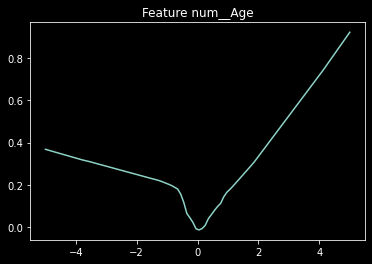

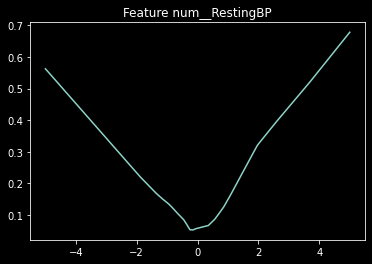

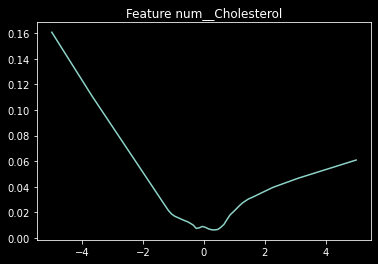

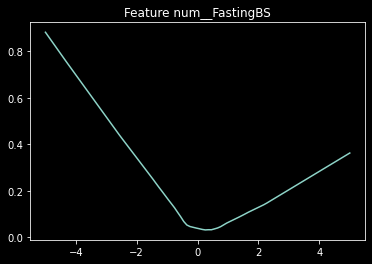

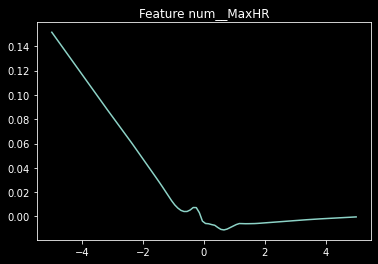

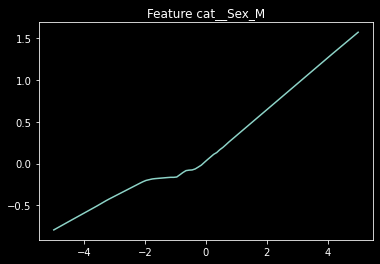

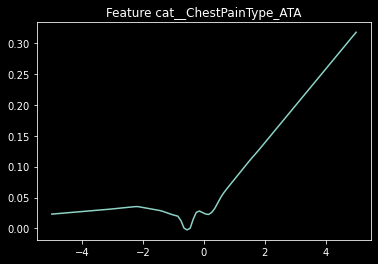

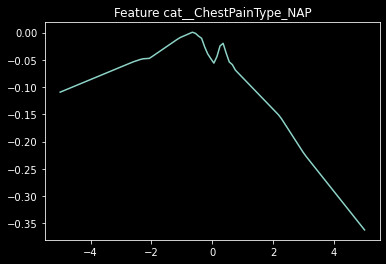

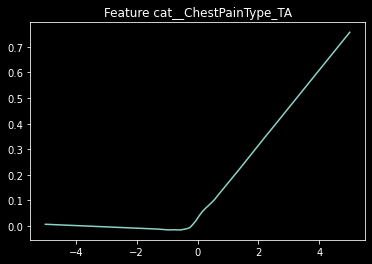

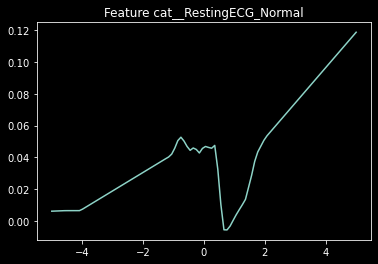

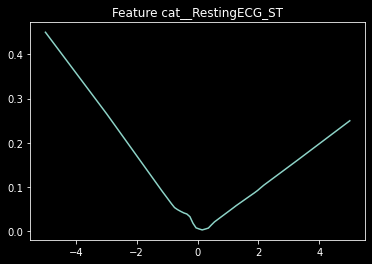

In [ ]:
# Predicting on y_test
model.eval()
with torch.no_grad():
    logits = model(torch.from_numpy(X_test).float().to(device))
    y_conf = F.softmax(logits, dim=1).max(1)[0].numpy()
    _, y_pred = logits.max(1)
    y_pred = y_pred.cpu().numpy()

# Accuracy
accuracy_score(y_test, y_pred)

import matplotlib.pyplot as plt

x = torch.linspace(-5, 5, 100).reshape(-1, 1)
x = torch.hstack(n_features*[x])

for i in range(n_features):
    plt.plot(
        x[:, 0].detach().numpy(),
        model.get_submodule('lr').weight[0][i].item() * model.get_submodule('features')(x)[:, i].detach().numpy())
    plt.title(f'Feature {preprocessor.get_feature_names_out()[i]}')
    plt.show()